<a href="https://colab.research.google.com/github/Ritil-Ranjan/Youtube/blob/main/Youtube6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Install required libraries
!pip install -q sentence-transformers scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.3 MB/s eta 0:00:00


In [2]:
# 2. Import libraries
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [12]:
# 3. Example list of comments
comments = [
    "India is the world's 7th largest country.",
    "Chinese people speak Chinese language.",
    "Russia is the world's largest country.",
    "India has 2nd highest population in the world.",
    "China does not support any religion",
    "Taj Mahal is located in India.",
    "In 1991, USSR disintegrated into Russia and some other small countries.",
    "China has the highest population in the world.",
    "Moscow is the capital of Russia.",
    "New Delhi is the capital of India."
]

In [4]:
# 4. Load Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [17]:
# 5. Generate embeddings
embeddings = model.encode(comments, show_progress_bar=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
# 6. Choose number of clusters
num_clusters = 3  # You can experiment with different values

In [19]:
# 7. Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

In [20]:
# 8. Create DataFrame
df = pd.DataFrame({'comment': comments, 'cluster': labels})

In [21]:
# 9. Display cluster results
for cluster in range(num_clusters):
    print(f"\n📌 Cluster {cluster}:")
    for comment in df[df['cluster'] == cluster]['comment'].tolist():
        print(f" - {comment}")


📌 Cluster 0:
 - India is the world's 7th largest country.
 - India has 2nd highest population in the world.
 - Taj Mahal is located in India.
 - China has the highest population in the world.
 - New Delhi is the capital of India.

📌 Cluster 1:
 - Russia is the world's largest country.
 - In 1991, USSR disintegrated into Russia and some other small countries.
 - Moscow is the capital of Russia.

📌 Cluster 2:
 - Chinese people speak Chinese language.
 - China does not support any religion


In [22]:
# 10. Optional: Compute silhouette score
score = silhouette_score(embeddings, labels)
print(f"\nSilhouette Score: {score:.2f}")


Silhouette Score: 0.13


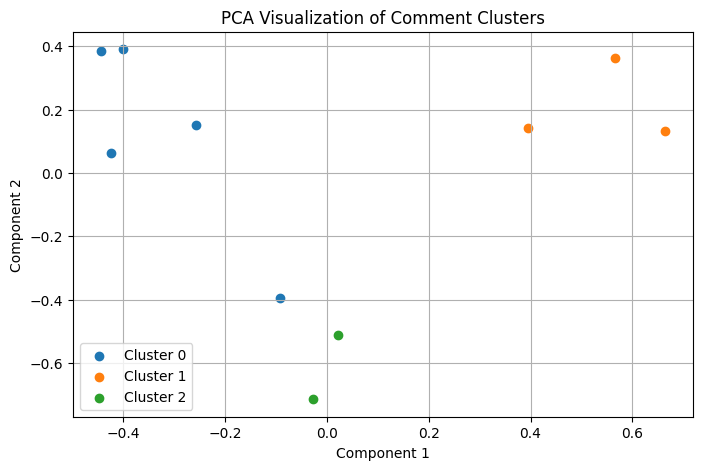

In [23]:
# 11. Optional: Visualize clusters using PCA
pca = PCA(n_components=2)
components = pca.fit_transform(embeddings)
plt.figure(figsize=(8, 5))
for cluster in range(num_clusters):
    indices = df['cluster'] == cluster
    plt.scatter(components[indices, 0], components[indices, 1], label=f"Cluster {cluster}")
plt.legend()
plt.title("PCA Visualization of Comment Clusters")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()